In [3]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('image/gray-cat.jpg')

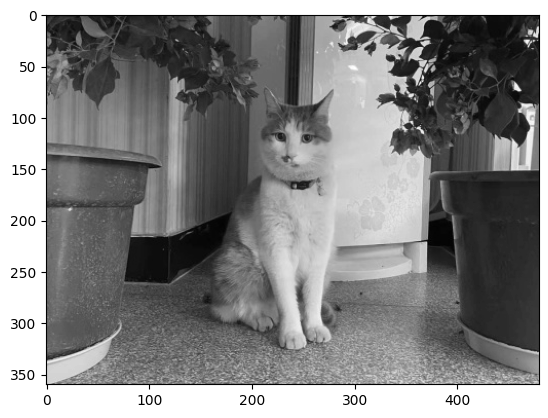

In [4]:
# display the image
plt.imshow(img, cmap='gray')

In [6]:
# convert image into a numpy array
img = np.asarray(img)
img

array([[ 30,  41,  38, ...,  52,  51,  39],
       [ 32,  36,  39, ...,  34,  33,  33],
       [ 38,  39,  44, ...,  30,  30,  31],
       ...,
       [206, 209, 211, ..., 215, 195, 158],
       [210, 209, 208, ..., 192, 186, 182],
       [207, 208, 212, ..., 169, 177, 170]], dtype=uint8)

(array([ 423., 1007., 2782., 2424., 2339., 3332., 4714., 7268., 7854.,
        5742., 4926., 4857., 5563., 4143., 3998., 4338., 4958., 5588.,
        5523., 5797., 6157., 5937., 5543., 5347., 5051., 5197., 3963.,
        3521., 3203., 2709., 2277., 2176., 2447., 2428., 2063., 1760.,
        1970., 3679., 3338., 4143., 4576., 3473., 1963., 1089.,  538.,
         249.,  275.,  105.,   37.,   10.]),
 array([  1.  ,   6.08,  11.16,  16.24,  21.32,  26.4 ,  31.48,  36.56,
         41.64,  46.72,  51.8 ,  56.88,  61.96,  67.04,  72.12,  77.2 ,
         82.28,  87.36,  92.44,  97.52, 102.6 , 107.68, 112.76, 117.84,
        122.92, 128.  , 133.08, 138.16, 143.24, 148.32, 153.4 , 158.48,
        163.56, 168.64, 173.72, 178.8 , 183.88, 188.96, 194.04, 199.12,
        204.2 , 209.28, 214.36, 219.44, 224.52, 229.6 , 234.68, 239.76,
        244.84, 249.92, 255.  ]),
 <BarContainer object of 50 artists>)

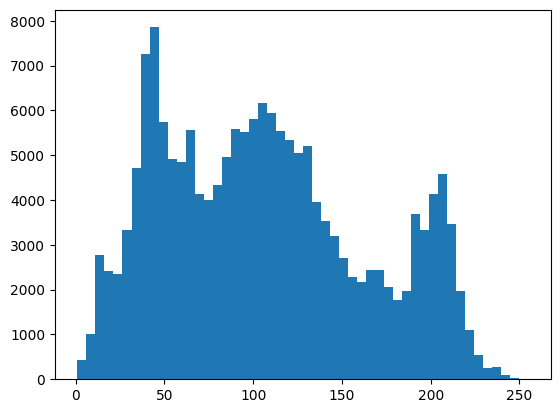

In [7]:
# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)

In [8]:
# formula for creating the histogram
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

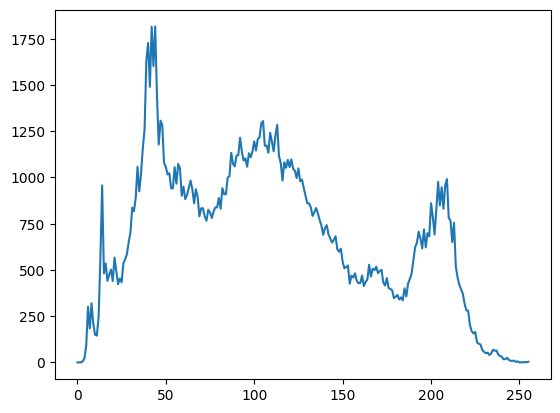

In [9]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

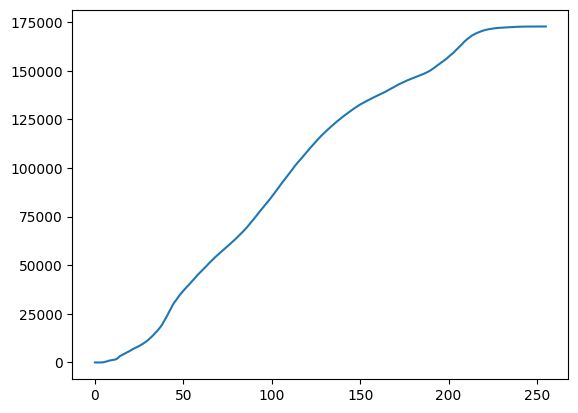

In [10]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

In [11]:
# formula to calculate cumulation sum
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

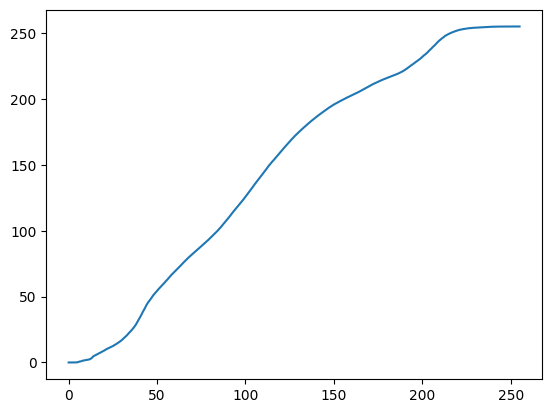

In [12]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

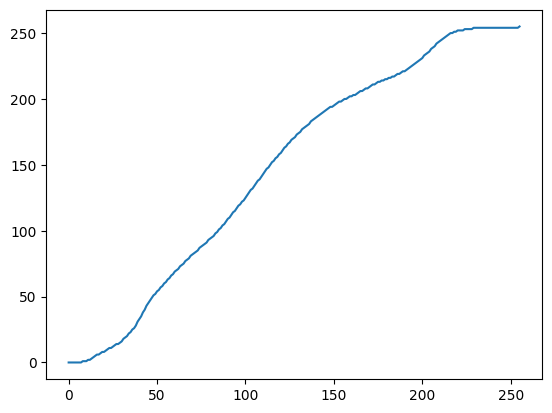

In [13]:
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

(array([3677., 3453., 3638., 3248., 3005., 2419., 4849., 3417., 3259.,
        2485., 4435., 3960., 3089., 3639., 2862., 3482., 3223., 4070.,
        3500., 2818., 4274., 3454., 3334., 3298., 3481., 3715., 2476.,
        3548., 3562., 3478., 4212., 3200., 3082., 3815., 3351., 3222.,
        3591., 3275., 3734., 3592., 3883., 3490., 3279., 3460., 3326.,
        3022., 3599., 3562., 3151., 3806.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

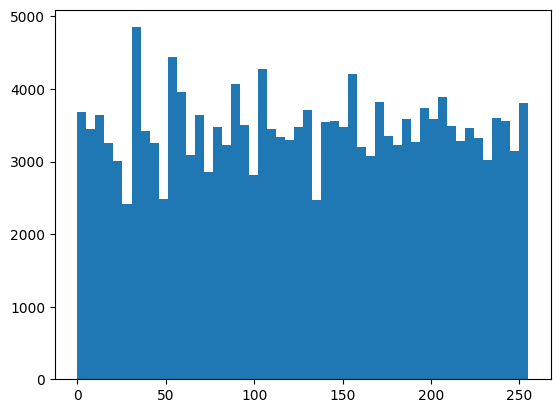

In [14]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=50)

In [15]:
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)
img_new

array([[ 16,  35,  28, ...,  57,  55,  31],
       [ 19,  25,  31, ...,  22,  20,  20],
       [ 28,  31,  43, ...,  16,  16,  18],
       ...,
       [239, 243, 245, ..., 249, 226, 201],
       [244, 243, 242, ..., 223, 219, 216],
       [240, 242, 246, ..., 208, 214, 209]], dtype=uint8)

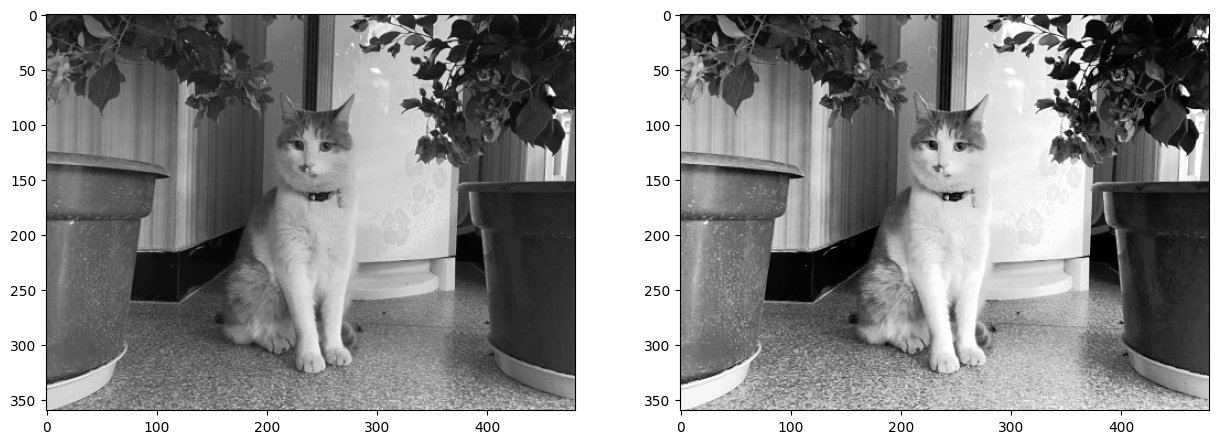

In [16]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)